<a href="https://colab.research.google.com/github/softmurata/colab_notebooks/blob/main/generative/openjourney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install accelerate diffusers transformers

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
model_id = "prompthero/openjourney"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
prompt = "retro serie of different cars with different colors and shapes, mdjrny-v4 style"
image = pipe(prompt).images[0]
image.save("./retro_cars.png")

In [ ]:
# Ref docs
# https://harusdia.hatenablog.com/entry/2023/01/05/184434

  0%|          | 0/50 [00:00<?, ?it/s]

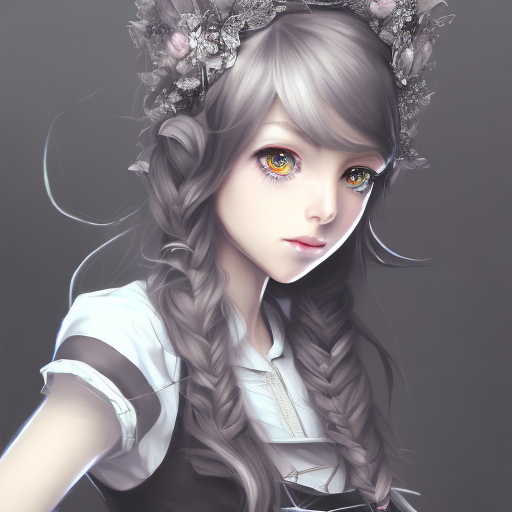

In [9]:
suffix = "mdjrny-v4 style"
prompt="pencil painting,girl,messy hair,long hair,ahoge,maid headdress,maid apron,shirts,ascot,long sleeves,monochrome,pixiv fan art, water color, " + suffix
image = pipe(prompt).images[0]
display(image)

In [1]:
#@title nijijourney
# Korakoe/OpenNiji
from diffusers import StableDiffusionPipeline
import torch
model_id = "Korakoe/OpenNiji"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [4]:
prompt = "1girl, eyes closed, slight smile, underwater, water bubbles, reflection, long light brown hair, bloom, depth of field, bokeh"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

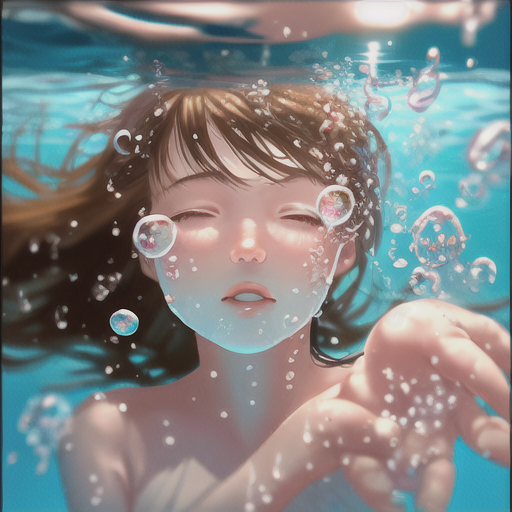

In [5]:
display(image)

In [ ]:
#@title controlnet with openjourney
!git clone https://github.com/lllyasviel/ControlNet.git

In [ ]:
!pip install gradio albumentations opencv-contrib-python imageio imageio-ffmpeg pytorch-lightning omegaconf test-tube streamlit einops transformers webdataset kornia open_clip_torch invisible-watermark streamlit-drawable-canvas torchmetrics timm addict yapf prettytable

In [ ]:
!pip install xformers triton

In [7]:
!pip install safetensors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.3 MB/s eta 0:00:00


In [1]:
%cd ControlNet

/content/ControlNet


In [ ]:
!wget https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_openpose.pth -P models
!wget https://huggingface.co/lllyasviel/ControlNet/resolve/main/annotator/ckpts/body_pose_model.pth -P annotator/ckpts
!wget https://huggingface.co/lllyasviel/ControlNet/resolve/main/annotator/ckpts/hand_pose_model.pth -P annotator/ckpts

In [ ]:
!wget https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned.ckpt -P models

In [ ]:
# get nijijourney safetensors
!wget https://huggingface.co/Korakoe/OpenNiji/resolve/main/OpenNiji.safetensors -P models

In [ ]:
"""
# settings
path_sd15 = './models/v1-5-pruned.ckpt'
path_sd15_with_control = './models/control_sd15_openpose.pth'
path_input = './models/OpenNiji.safetensors'
path_output = './models/control_any3_openpose.pth'
"""

In [10]:
# why out of memory...
!python tool_transfer_control.py

2023-02-28 09:08:31.860271: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 09:08:35.042253: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-28 09:08:35.042494: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-28 09:08:35.042525: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War